### Load Dataset

In [ ]:
!gdown 1dhHnuKPQdRJiye58zQUXLLeCual-Arpd

Downloading...
From: https://drive.google.com/uc?id=1dhHnuKPQdRJiye58zQUXLLeCual-Arpd
To: /content/re_make_dataset_220720.zip
100% 198M/198M [00:00<00:00, 241MB/s]


In [ ]:
!unzip /content/re_make_dataset_220720.zip

Archive:  /content/re_make_dataset_220720.zip
   creating: make_data/
   creating: make_data/1/
   creating: make_data/1/masks/
  inflating: make_data/1/masks/b_0114.jpg  
  inflating: make_data/1/masks/a_088.jpg  
  inflating: make_data/1/masks/d_0299.jpg  
  inflating: make_data/1/masks/a_085.jpg  
  inflating: make_data/1/masks/a_018.jpg  
  inflating: make_data/1/masks/b_0175.jpg  
  inflating: make_data/1/masks/d_0282.jpg  
  inflating: make_data/1/masks/b_0194.jpg  
  inflating: make_data/1/masks/b_0165.jpg  
  inflating: make_data/1/masks/a_026.jpg  
  inflating: make_data/1/masks/d_0225.jpg  
  inflating: make_data/1/masks/c_10.jpg  
  inflating: make_data/1/masks/a_086.jpg  
  inflating: make_data/1/masks/b_0129.jpg  
  inflating: make_data/1/masks/d_0214.jpg  
  inflating: make_data/1/masks/d_0284.jpg  
  inflating: make_data/1/masks/d_0212.jpg  
  inflating: make_data/1/masks/d_0224.jpg  
  inflating: make_data/1/masks/a_029.jpg  
  inflating: make_data/1/masks/b_0169.jpg  


### Import

In [ ]:
import os
import cv2
import numpy as np
from tqdm.notebook import tqdm
from google.colab.patches import cv2_imshow

### Padding & Resizing

In [ ]:
def padding(img, set_size):

  try:
    h,w,c = img.shape # img shape ( height, weight, channel ) 를 h,w,c 변수로 저장
  except:
    print('restart')
    raise

  if h<w: # 원본 이미지에서 h<w일때
    new_width = set_size # 리사이즈할 크기를 입력( set_size )
    new_height = int(new_width*(h/w)) # 리사이즈하되 원본의 h,w 비율을 가져가기위한 계산
  else: # 원본 이미지에서 h>w일때
    new_height = set_size
    new_width = int(new_height*(w/h))

  if max(h,w) < set_size:
    img = cv2.resize(img, (new_width, new_height), cv2.INTER_CUBIC) # INTER_CUBIC : 사이즈를 크게할 떄 사용하는 보간법
  else:
    img = cv2.resize(img, (new_width, new_height), cv2.INTER_AREA) # INTER_AREA : 사이즈를 작게할 때 사용하는 보간법

  try:
    h,w,c = img.shape
  except:
    print('restart')
    raise
  
  delta_w = set_size - w
  delta_h = set_size - h
  top, bottom = delta_h//2,delta_h-(delta_h//2)
  left, right = delta_w//2,delta_w-(delta_w//2)

  new_img=cv2.copyMakeBorder(img,top,bottom,left,right,cv2.BORDER_CONSTANT,value=[0,0,0]) # copyMakeBorder : 패딩 작업에서, 이미지에 포토프레임 같은 경계선을 만들 떄
                                                                                          # BORDER_CONSTANT :  단색의 경계를 추가하는 것, value에서 색의 지정
  return new_img

In [ ]:
!mkdir /content/a

In [ ]:
img_path = '/content/make_data/3/images/' # 패딩과 리사이징 할 이미지 경로
mask_path = '/content/make_data/3/masks/' # 패딩과 리사이징 할 마스크 경로

img_list = os.listdir(img_path) # os,listdir 사용하여 경로 안의 파일들을 리스트로 불러옴
mask_list = os.listdir(mask_path)

for i,j in zip(tqdm(img_list),tqdm(mask_list)):
  dir = img_path + i # 경로설정
  dir2 = mask_path + j

  img = cv2.imread(dir) # 이미지들을 불러옴
  img = padding(img, 512) # 불러온 이미지들을 위에서 만든 padding 함수를 통해 512x512 크기로 패딩, 리사이징해줌
  mask = cv2.imread(dir2)
  mask = padding(mask, 512)

  cv2.imwrite(dir,img) # 패딩과 리사이즈가 적용된 파일들을 원래 경로로 덮어씌워 저장
  cv2.imwrite(mask,img)

191
['b_0132.jpg', 'a_054.jpg', 'd_0268.jpg', 'b_0117.jpg', 'a_067.jpg', 'd_0266.jpg', 'd_0285.jpg', 'a_081.jpg', 'a_041.jpg', 'c_47.jpg', 'd_0255.jpg', 'd_0239.jpg', 'b_0196.jpg', 'd_0295.jpg', 'c_43.jpg', 'c_20.jpg', 'd_0214.jpg', 'a_045.jpg', 'a_096.jpg', 'b_0181.jpg', 'c_31.jpg', 'd_0242.jpg', 'd_0225.jpg', 'd_0213.jpg', 'd_0227.jpg', 'a_069.jpg', 'c_38.jpg', 'c_17.jpg', 'b_0200.jpg', 'd_0233.jpg', 'c_48.jpg', 'c_22.jpg', 'b_0186.jpg', 'a_012.jpg', 'a_064.jpg', 'b_0164.jpg', 'b_0187.jpg', 'a_01.jpg', 'b_0108.jpg', 'a_068.jpg', 'a_091.jpg', 'd_0236.jpg', 'b_0141.jpg', 'c_80.jpg', 'c_41.jpg', 'd_0250.jpg', 'd_0253.jpg', 'c_70.jpg', 'd_0229.jpg', 'd_0254.jpg', 'd_0269.jpg', 'a_017.jpg', 'b_0135.jpg', 'd_0265.jpg', 'c_24.jpg', 'd_0274.jpg', 'a_035.jpg', 'a_044.jpg', 'b_0167.jpg', 'd_0243.jpg', 'b_0136.jpg', 'b_0157.jpg', 'd_0219.jpg', 'd_0279.jpg', 'b_0163.jpg', 'b_0150.jpg', 'b_0177.jpg', 'c_27.jpg', 'a_053.jpg', 'b_0128.jpg', 'a_036.jpg', 'a_049.jpg', 'c_57.jpg', 'd_0211.jpg', 'd_025

  0%|          | 0/191 [00:00<?, ?it/s]

In [ ]:
### 리사이징이 잘 되있는지 확인
img = cv2.imread('/content/make_data/1/images/a_010.jpg')
mask = cv2.imread('/content/make_data/1/masks/a_010.jpg')
print(img.shape, mask.shape)

(512, 512, 3) (512, 512, 3)


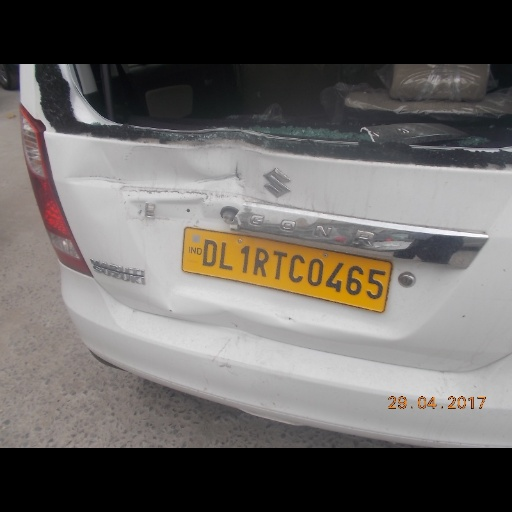

In [ ]:
### 패딩이 잘 되있는지 확인
cv2_imshow(img)

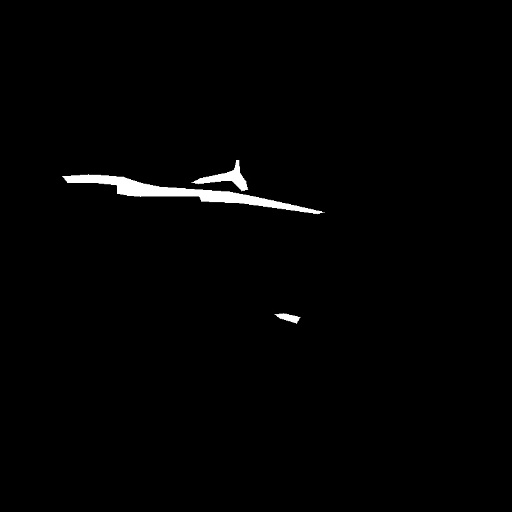

In [ ]:
cv2_imshow(mask)